In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')


In [7]:
toyota_info = pd.read_csv('ToyotaCorolla.csv', encoding='ISO-8859–1')
toyota_info

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [8]:
toyota=toyota_info[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
toyota.shape

(1436, 9)

In [10]:
toyota.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [11]:
toyota.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [12]:
toyota.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

### Assumption Test


#### 1.Normality Test

<function matplotlib.pyplot.show(close=None, block=None)>

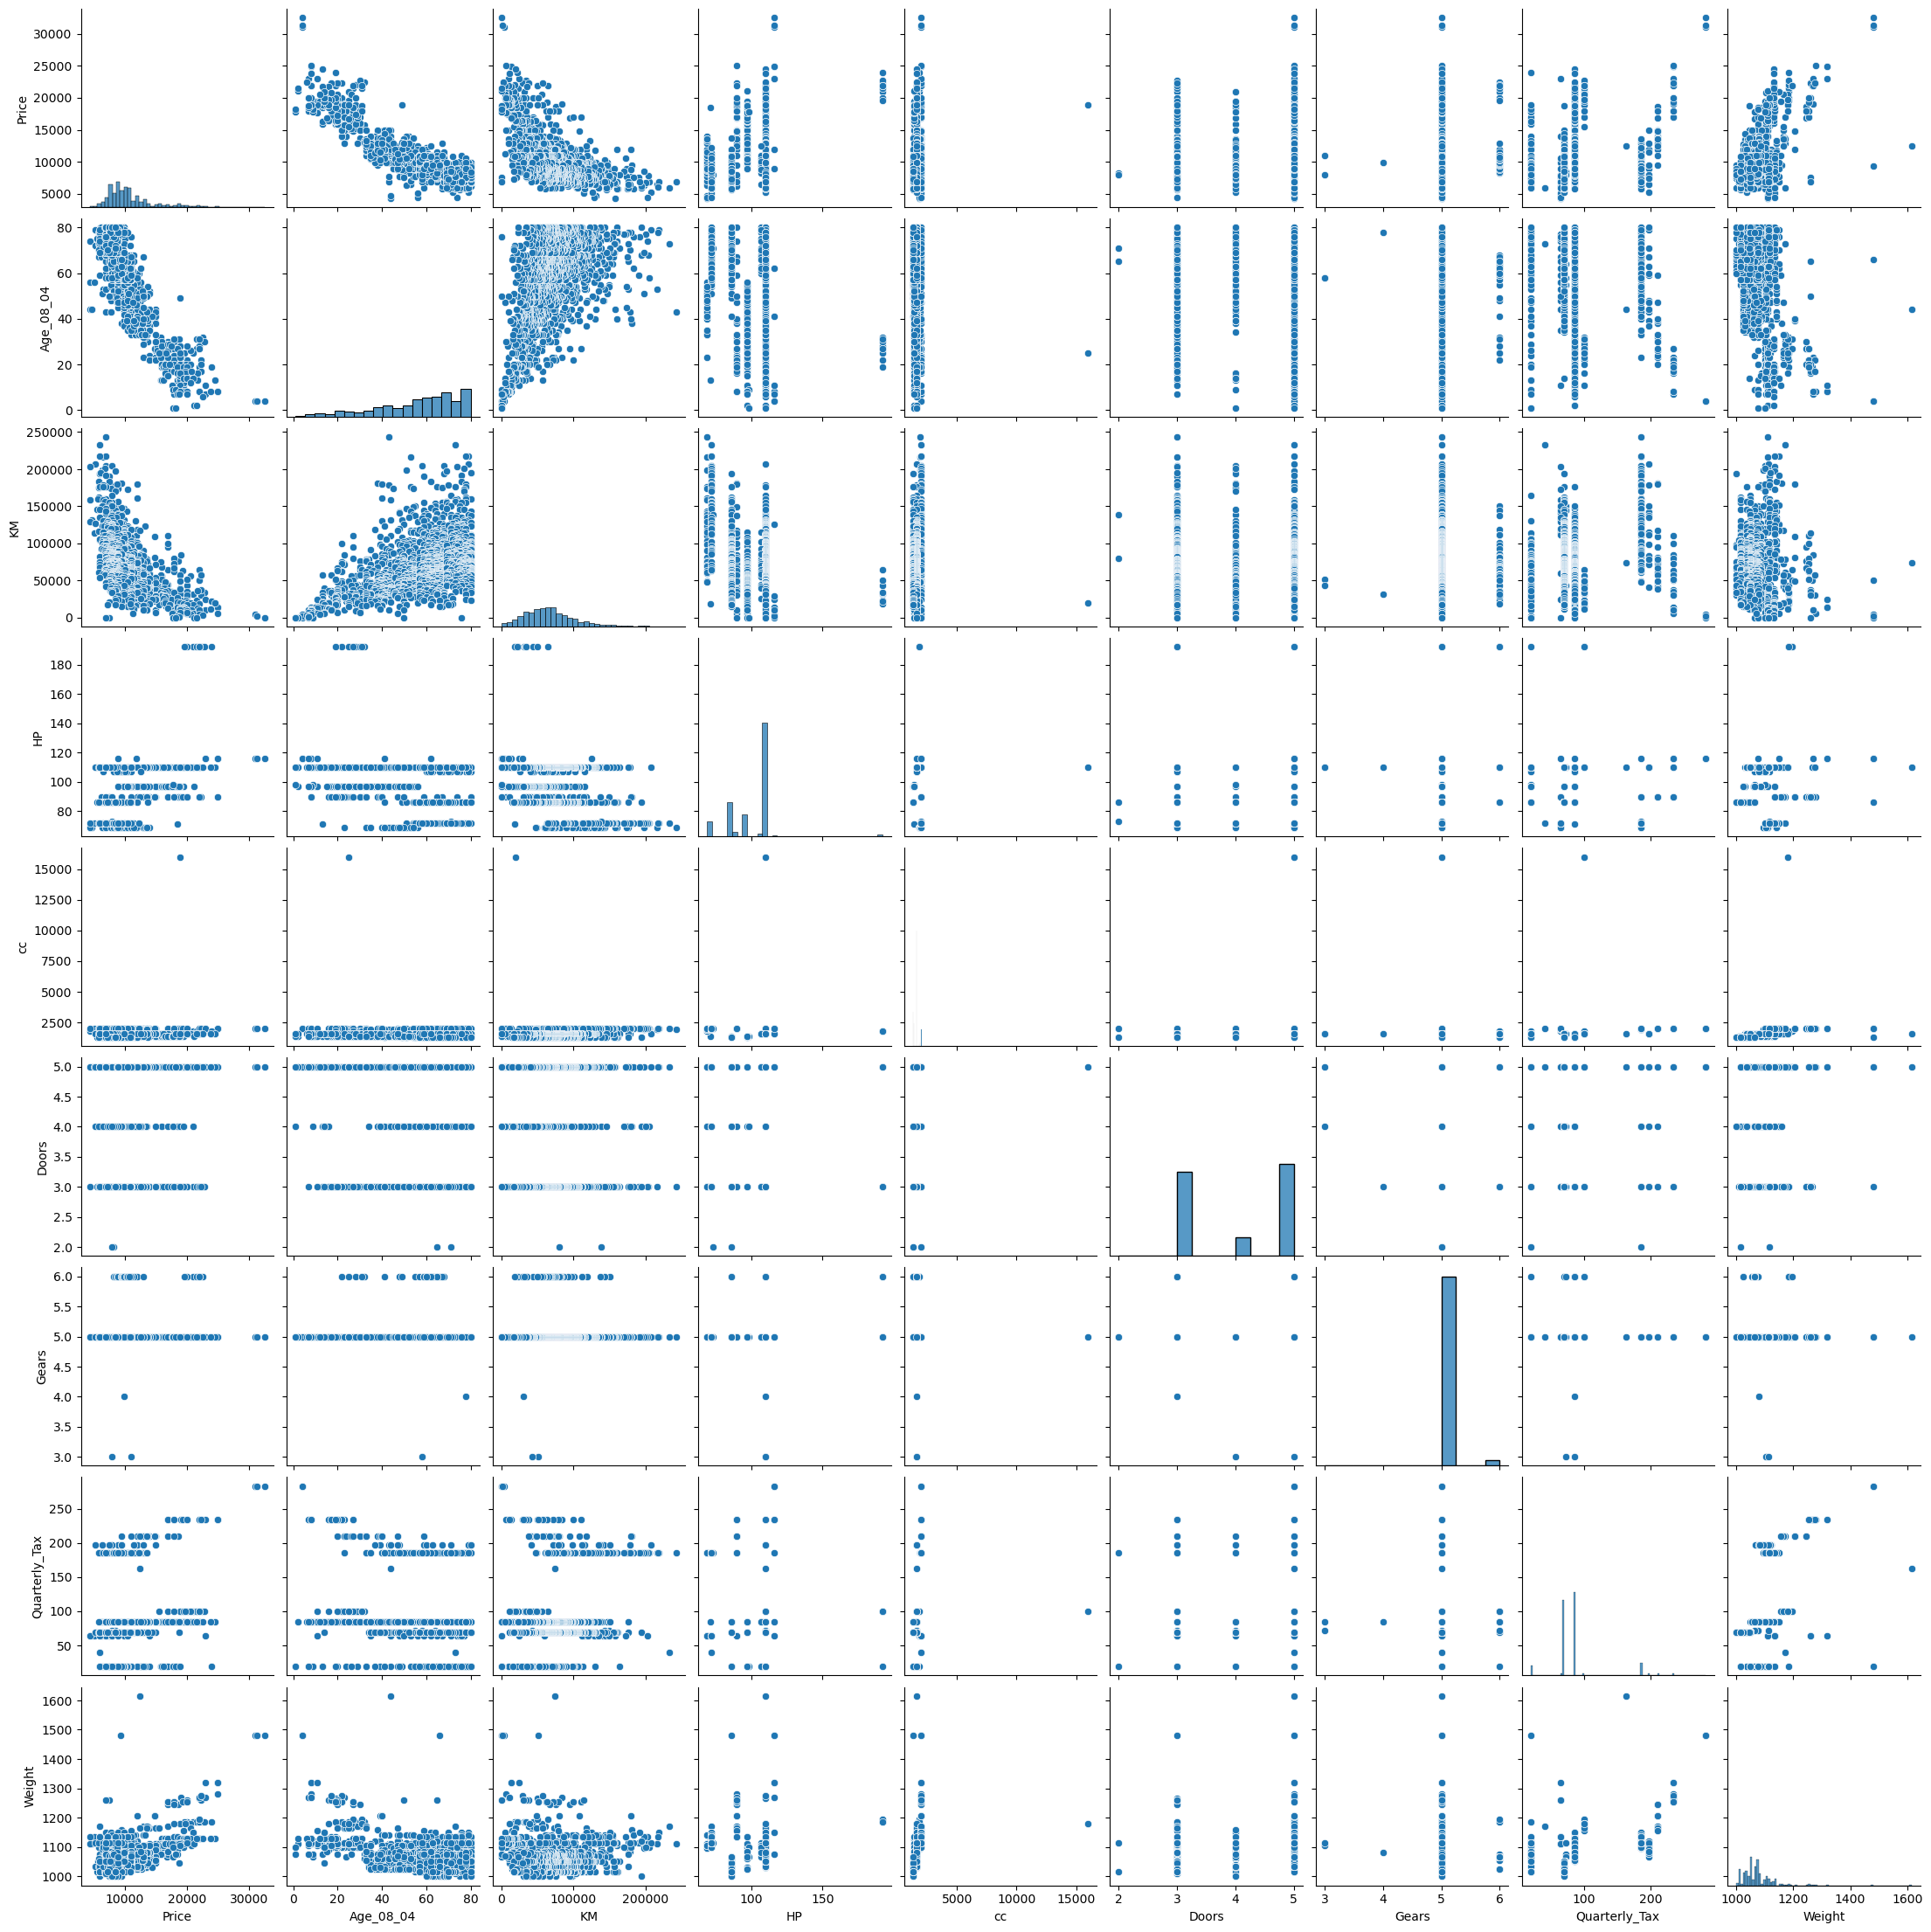

In [14]:
sns.pairplot(toyota)
plt.show

In [15]:
toyota_corr=toyota.corr()
toyota_corr

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


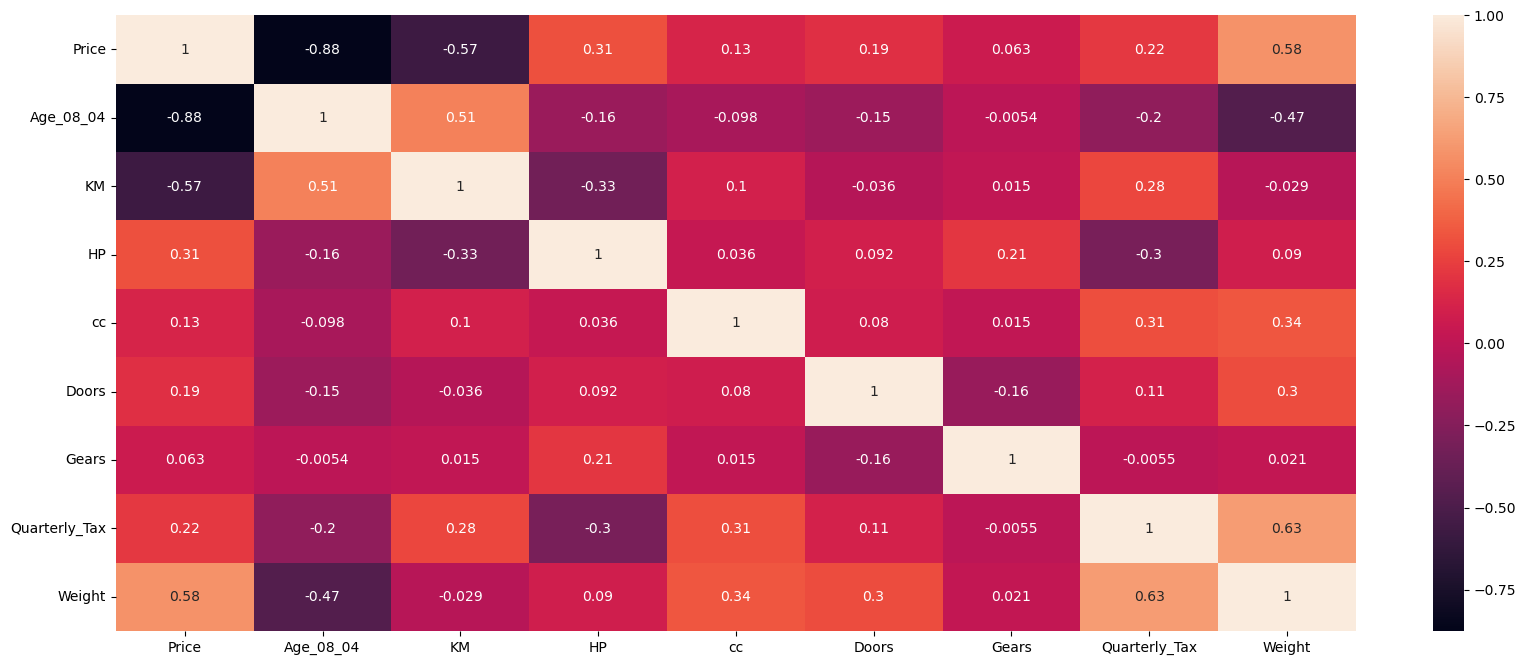

In [16]:
plt.figure(figsize=(20,8))
sns.heatmap(toyota_corr,annot=True)
plt.show()

In [17]:
x=toyota.drop('Price',axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled_x=scaler.fit_transform(x)

In [18]:
scaled_x=pd.DataFrame(data=scaled_x,columns=["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])

### Variance Influence Factor

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['feature']=scaled_x.columns
vif_data['VIF']=[variance_inflation_factor(scaled_x.values,i)
                for i in range(len(scaled_x.columns))]
vif_data

,feature,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


#### All the above VIF values are below 5,which indicates features are less correlated

### Model Building

In [20]:
x=scaled_x
y=toyota[['Price']]

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=12)

In [22]:
x_train.shape,y_train.shape

((1416, 8), (1416, 1))

In [23]:
x_test.shape,y_test.shape

((20, 8), (20, 1))

### Model Training

In [24]:
from sklearn.linear_model import LinearRegression
linear_model= LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

### Model Testing

In [25]:
y_pred_train=linear_model.predict(x_train)

In [26]:
y_pred_test=linear_model.predict(x_test)

### Model Evaluation

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
mean_squared_error(y_train,y_pred_train)

1802163.2779422002

In [29]:
r2_score(y_train,y_pred_train)

0.8627863048859701

In [30]:
mean_squared_error(y_test,y_pred_test)

998514.7632529227

In [31]:
r2_score(y_test,y_pred_test)

0.9269816243901043

### Model building using statsmodel

In [32]:
model1=smf.ols(formula='Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit()

### Model Testing

In [33]:
model1.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [34]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 18 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:21:44   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Here "cc" and "Doors" are having insignificant values,so build SLR and MLR with these features

In [35]:
slr_cc=smf.ols(formula='Price~cc',data=toyota).fit()

In [36]:
slr_cc.params

Intercept    9027.554784
cc              1.080168
dtype: float64

In [37]:
slr_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.55e-06
Time:                        15:21:46   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
slr_doors=smf.ols(formula='Price~Doors',data=toyota).fit()

In [39]:
slr_doors.params

Intercept    7885.005835
Doors         705.558636
dtype: float64

In [41]:
slr_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.46e-12
Time:                        15:21:51   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
mlr=smf.ols(formula='Price~cc+Doors',data=toyota).fit()

In [43]:
mlr.params

Intercept    6509.421098
cc              0.959740
Doors         671.397311
dtype: float64

In [44]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.15e-15
Time:                        15:21:53   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Both have significant values,so it's okay to include it in the input features 

### Checking Residuals

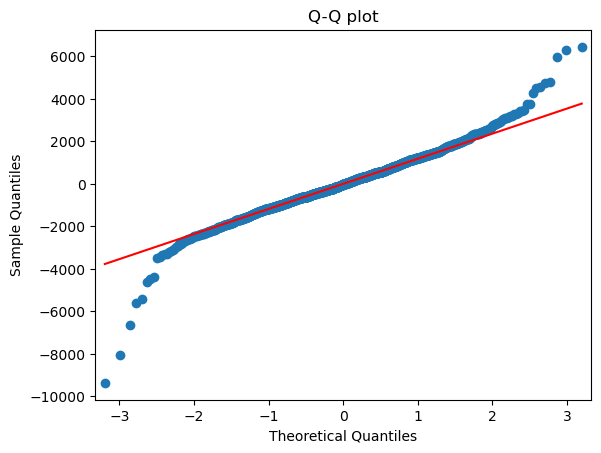

In [45]:
import statsmodels.api as sm
sm.qqplot(model1.resid,line='q')
plt.title('Q-Q plot')
plt.show()

 #### Outlier detection from above q-q plot of residuals

In [46]:
list(np.where(model1.resid>6000))

[array([147, 523], dtype=int64)]

In [47]:
list(np.where(model1.resid<-6000))

[array([221, 601, 960], dtype=int64)]

### Model Deletion using Cook's D

In [48]:
influence=model1.get_influence()
cooks,_=influence.cooks_distance

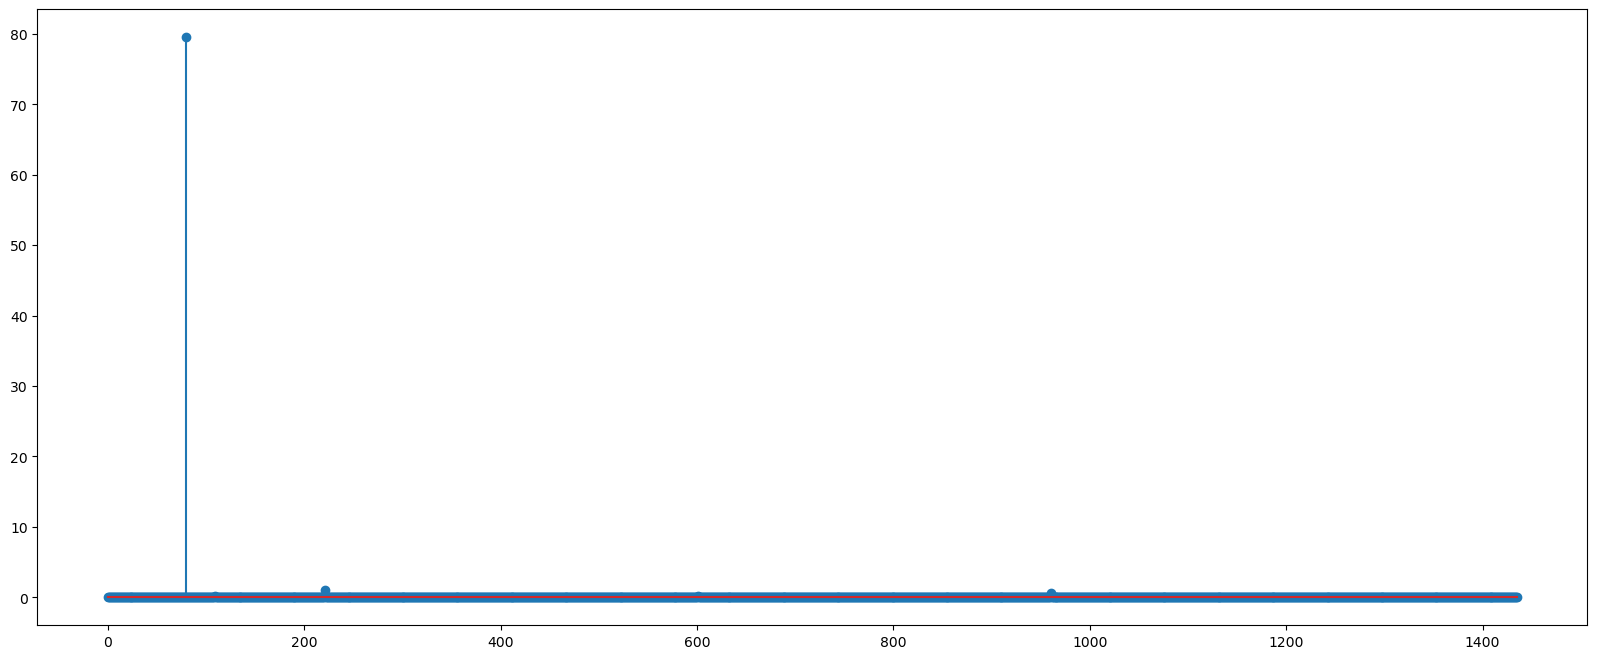

In [49]:
plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(toyota)),np.round(cooks,3))
plt.show()

In [50]:
np.argmax(cooks),np.max(cooks)

(80, 79.5201062414182)

### Influence Plot

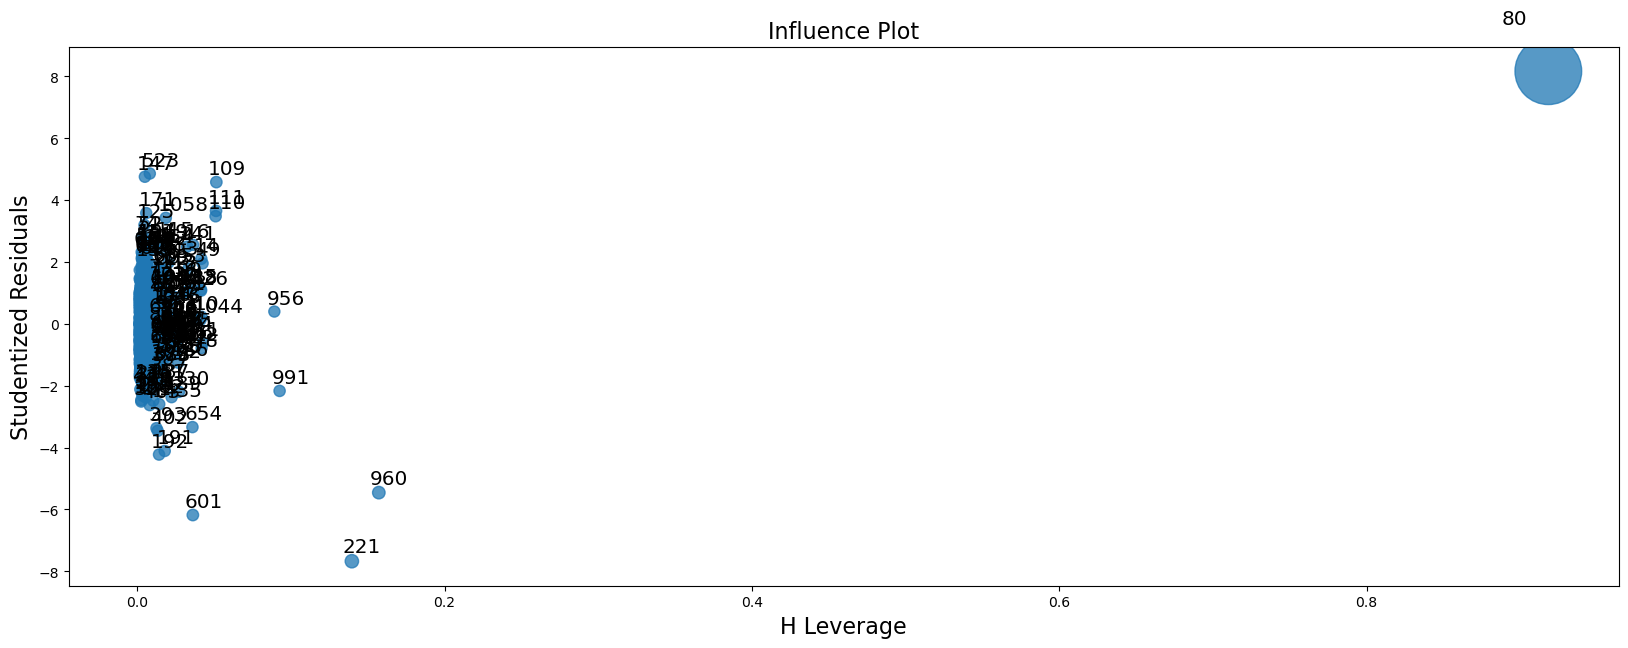

In [51]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(20,7))
influence_plot(model1,ax=ax)
plt.show()

In [52]:
toyota=toyota.drop(80,axis=0)

In [53]:
toyota[toyota.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


In [54]:
model2=smf.ols(formula='Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit()

In [55]:
model2.params

Intercept       -6284.740060
Age_08_04        -120.455049
KM                 -0.017849
HP                 39.346295
cc                 -2.524177
Doors             -27.228488
Gears             523.941556
Quarterly_Tax       9.043968
Weight             20.165459
dtype: float64

In [56]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Fri, 18 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:22:12   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
influence1=model2.get_influence()
cooks2,_=influence1.cooks_distance

<StemContainer object of 3 artists>

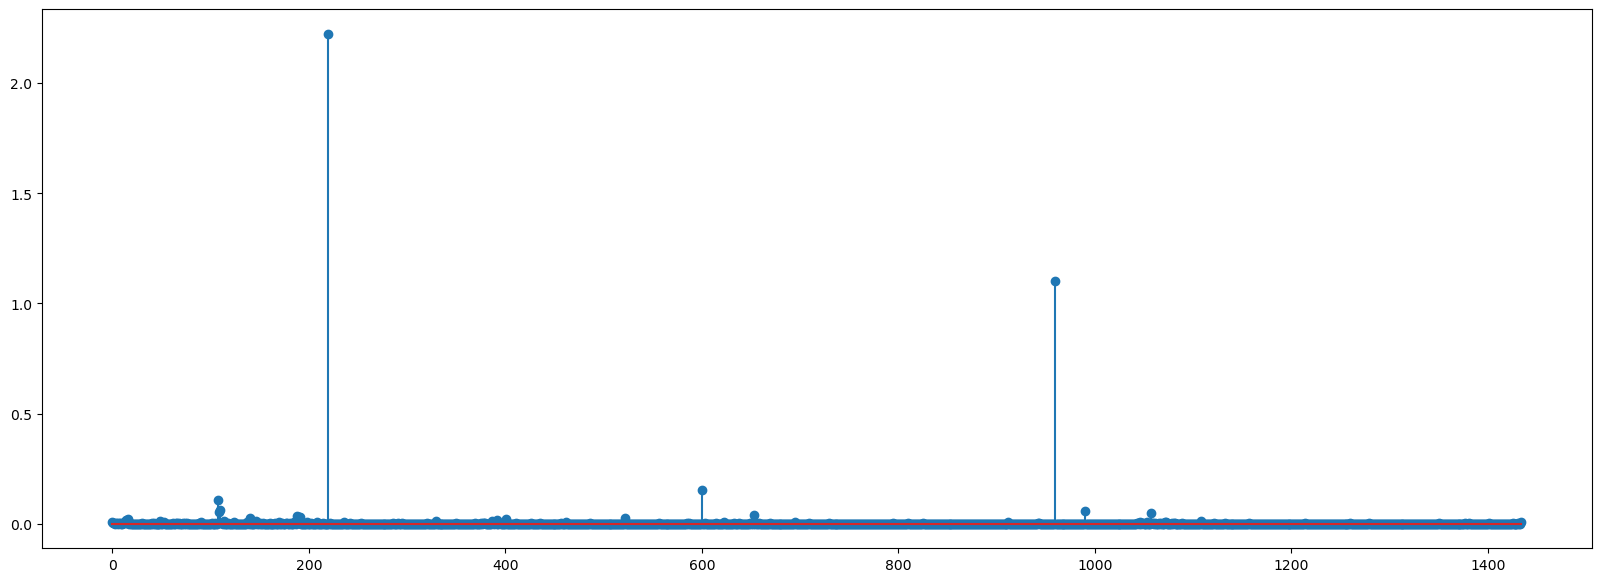

In [58]:
figplot=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota)),np.round(cooks2,3))

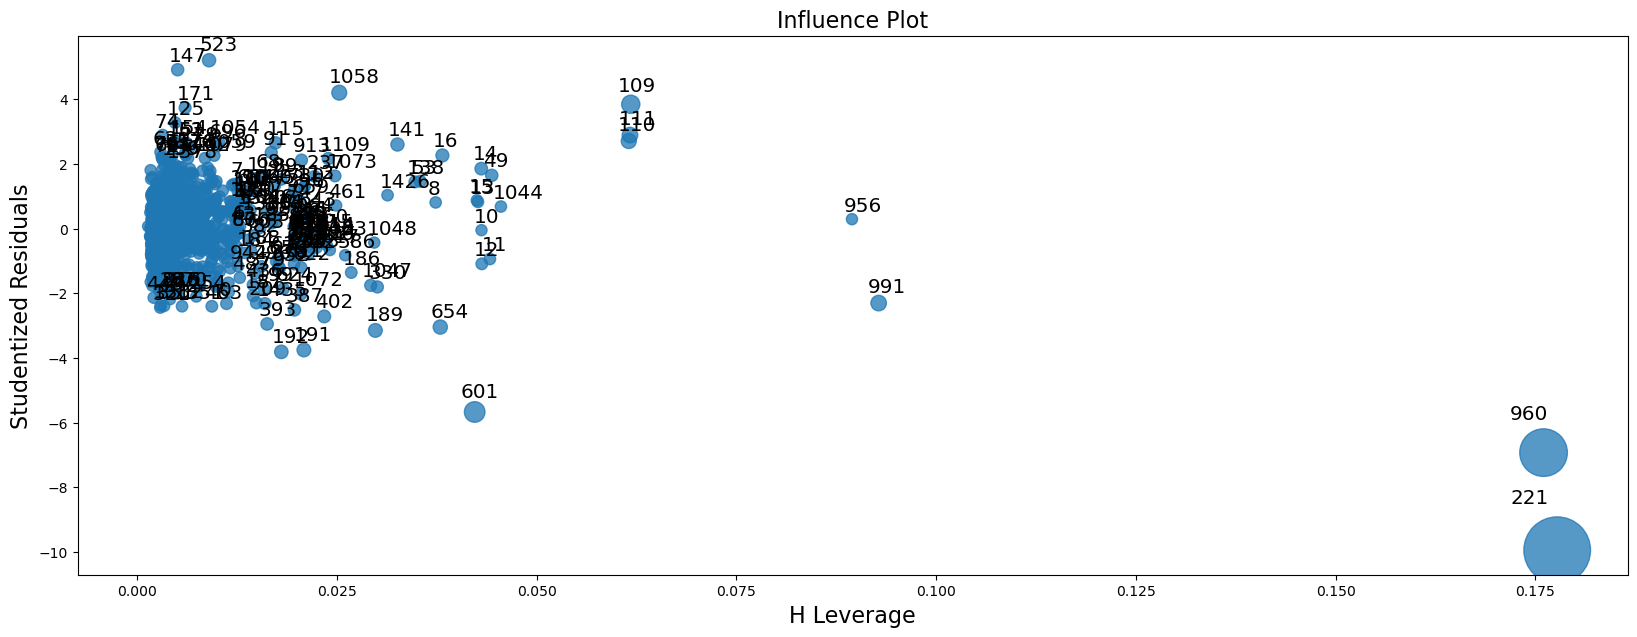

In [59]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(20,7))
influence_plot(model2,ax=ax)
plt.show()


In [60]:
toyota=toyota.drop(960,axis=0)

In [61]:
toyota[toyota.index.isin([960])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


In [62]:
toyota=toyota.drop(221,axis=0)

In [63]:
toyota[toyota.index.isin([221])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


In [64]:
model3=smf.ols(formula='Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit()


In [65]:
influence3=model3.get_influence()
cooks3,_=influence3.cooks_distance

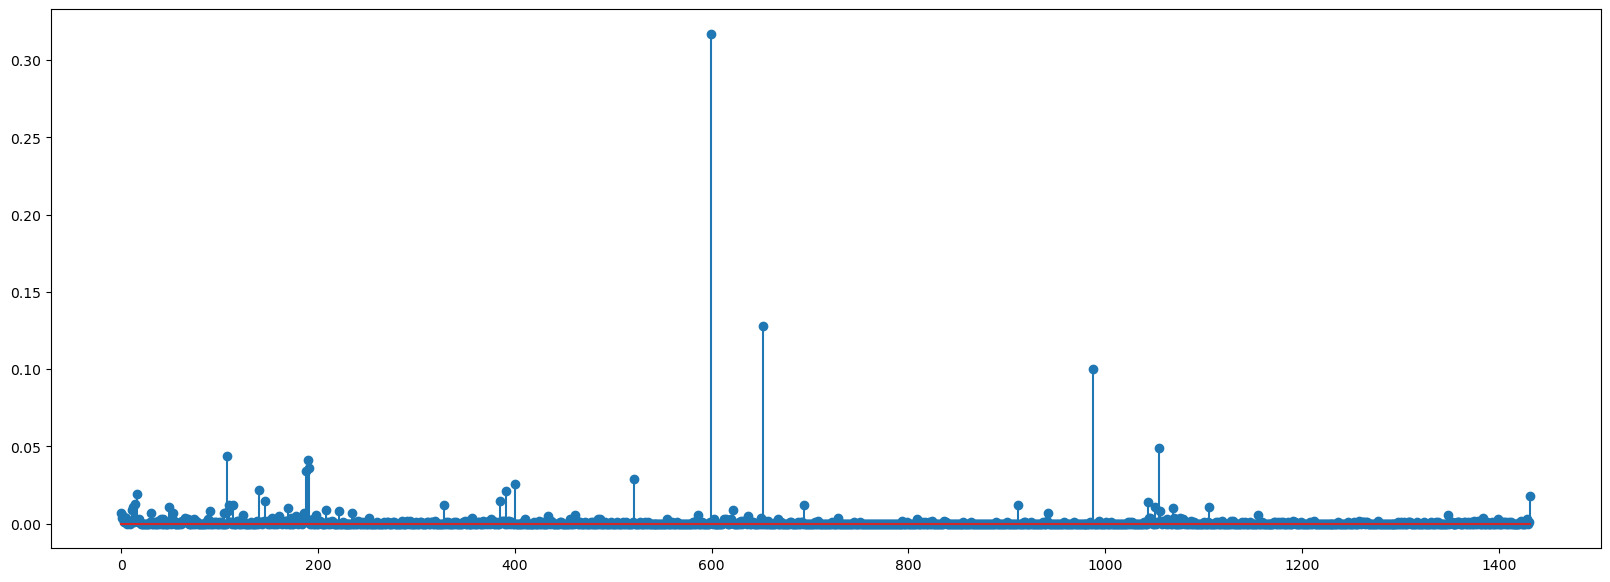

In [66]:
figplot=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota)),np.round(cooks3,3))
plt.xlabel=("Row index")
plt.ylabel=("Cooks D")

### Cooks Distance got reduced to less than 1

In [67]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Fri, 18 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:22:20   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Here among various models,model3 with 88.5% accuracy level is selected 